In [80]:
# neural network coursework

from math import e, tanh, sqrt
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random




## Importing Data

In [81]:
def import_and_pre_process(path='CWData.csv', ratio=0.2)->list[pd.DataFrame,pd.DataFrame,pd.DataFrame]:
    df=pd.read_csv(path)
    print(df)
    X=df.loc[:, df.columns != 'Index flood']
    y=df['Index flood']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train.values, X_test.values, y_train.values, y_test.values)

data=import_and_pre_process()


         AREA   BFIHOST      FARL     FPEXT       LDP   PROPWET   RMED-1D  \
0    0.113654  0.436954  0.891444  0.301211  0.175194  0.328571  0.427018   
1    0.158923  0.584238  0.835829  0.733132  0.276144  0.176190  0.318947   
2    0.257193  0.380795  0.510695  0.203467  0.354229  0.341270  0.473333   
3    0.425334  0.377616  0.878610  0.586957  0.471888  0.544444  0.443860   
4    0.130097  0.273775  0.733155  0.560539  0.229784  0.265079  0.442456   
..        ...       ...       ...       ...       ...       ...       ...   
518  0.102541  0.314040  0.900000  0.115850  0.115014  0.455556  0.453684   
519  0.164335  0.498411  0.891444  0.288442  0.308622  0.277778  0.464912   
520  0.128473  0.406225  0.887166  0.307375  0.210687  0.620635  0.619298   
521  0.600158  0.398808  0.831551  0.358448  0.655320  0.569841  0.631930   
522  0.182672  0.353245  0.463636  0.326307  0.376027  0.658730  0.667018   

         SAAR  Index flood  
0    0.249076     0.115641  
1    0.115195    

## Establishing the matrices

In [115]:
def abs_error(y_target,y_pred)->float:
    error_arr=y_target-y_pred

    return error_arr

#learning parameter
lp = 0.1


activation="tan"

epochs=2000

momentum= 0

hidden_biases = np.random.rand(1,8)
hidden_biases_grad= np.zeros((8,8))
output_bias = random.randint(1,100)


# doing random 
hidden_weight= np.random.rand(8,8)
hidden_weight_grad=np.zeros((8,8))
output_weight = random.randint(1,100)






def proper_back_prop(X_train, y_train, hidden_biases, hidden_biases_grad,output_bias, hidden_weight,hidden_weight_grad, output_weight,epochs,lp=0.1):

    def activation(sig):
        #print(sig)
        value = (1) / (1 + (e ** (sig*-1)))
        #print(value)
        return value

    def diff(node):
        value = (node) * (1 - (node))
        return value
    
    print(hidden_weight)

    #input layer
    sum = np.matmul(hidden_weight, X_train.T)
    derivatve = activation(sum)
    weight_sum= np.matmul(hidden_weight,derivatve)

    #output layer
    weight_sum+=output_bias

    output=activation(weight_sum)

    error= y_train-output

    #backward pass

    output_diff = diff(output)

    delta_output = error * output_diff

    hidden_diff = diff(derivatve)

    print(hidden_diff.shape)

    print(hidden_weight.shape)

    delta_hidden = np.matmul(hidden_diff, hidden_weight.T) #* delta_output

    print(delta_hidden.shape)

    print(hidden_weight.shape)

    hidden_weight += lp * delta_hidden.T

    """
    for epoch in range(epochs):
        # forward pass on each hidden_weight
        # forward pass

        weight_sum= np.zeros((8,8))
        weight_sum = hidden_weight * X_train.T + hidden_biases

 
        sum_val_1= (w0 * val_1) + bias_1 + (w1to0 * val_2)
        u_1 = activation(sum_val_1)
        weight_sum+= (u_1 * w0o)
    

        pass
    """

    # backward pass
    pass


X_train, X_test, y_train, y_test = data
proper_back_prop(X_train, y_train, hidden_biases, hidden_biases_grad,output_bias, hidden_weight,hidden_weight_grad, output_weight,epochs)

[[0.14716325 0.29797724 0.0897595  0.91082626 0.00604704 0.48386022
  0.12324746 0.30767909]
 [0.92605956 0.16169455 0.96583232 0.20579438 0.74156611 0.54667726
  0.88447873 0.55399326]
 [0.53455922 0.195458   0.16622936 0.91648915 0.3278382  0.37208225
  0.75982366 0.33882348]
 [0.95206245 0.73792777 0.59742924 0.88089516 0.04960591 0.25706269
  0.46503633 0.22697854]
 [0.74390519 0.91920803 0.42377012 0.3421326  0.96155073 0.44485243
  0.4890484  0.35164987]
 [0.90954847 0.56895548 0.76217459 0.81180672 0.34184904 0.43369433
  0.84847177 0.36325535]
 [0.79393513 0.94099232 0.62321037 0.74162729 0.80509731 0.84503965
  0.39505334 0.05126346]
 [0.40187627 0.67375623 0.45035039 0.74896315 0.35698243 0.63474414
  0.1864198  0.74936944]]
(8, 418)
(8, 8)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 418)

In [ ]:
x = 0

path = 'CWData.csv'

data = []

training = []  # 60% of data
validation = []  # 20% of data
testing = []  # 20 % of data


df = pd.read_csv(path)
# Skip the header row if it exists
df = df.iloc[1:] if df.iloc[0].equals(df.columns) else df
data = df.values.tolist()
#print(data)
np.random.seed(42)

lp:  0.1
momentum:  0
weight:  -0.0001
weight:  -0.0004
weight:  0.0004
weight:  -0.0006
weight:  0.0004
weight:  -0.0007
weight:  0.0007
weight:  -0.0007
weight:  0.0002
weight:  -0.0008
weight:  -0.0002
weight:  0.0002
weight:  0.0003
weight:  0.0002
weight:  -0.0002
weight:  0.0004
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
weight:  0
bias:  0
bias:  0
bias:  0
bias:  0
bias:  0
bias:  0
bias:  0
bias:  0
bias:  0
acc:  228.455300083594
pred:  167.43033521181462
msre:  0.20238317675806178
rmse:  3989.736893666455


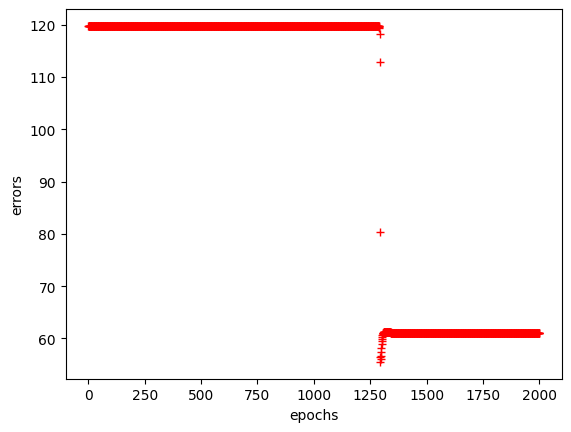

'\n#LMS Algorithm done for comparison\n\nw8=1\nfor i in range(len(testing)):\n    for j in range(8):\n\n        bias = 1\n        area = training[j][0]\n        bfihost= training[j][1]\n        farl=training[j][2]\n        fpext= training[j][3]\n        ldp= training[j][4]\n        propwet= training[j][5]\n        rmed=training[j][6]\n        saar=training[j][7]\n        flood=training[j][8]\n\n        error=flood-(w0+(w1*area)+(w2*bfihost) + (w3*farl)+(w4*fpext)\n                              +(w5*ldp)+(w6*propwet) + (w7*rmed)+(w8*saar))\n        w0=w0+lp*error*bias\n        w1=w1+lp*error*area\n        w2=w2+lp*error*bfihost\n        w3 = w3 + lp * error * farl\n        w4 = w4 + lp * error * fpext\n\n        w5 = w5 + lp * error * ldp\n        w6 = w6 + lp * error * propwet\n        w7 = w7 + lp * error * rmed\n        w8 = w8 + lp * error * saar\n\n    #print("Loop: " +str((i+1)))\n    error_arr.append(error*-1)\n    weight_set.append([w0, w1, w2, w3, w4, w5, w6, w7, w8])\n    epoc

In [ ]:
# splitting the data into training, validation and training sets
length = len(data)

train_val = round(0.6 * length)

for i in range(0, train_val):
    training.append(data[i])

val_test = round(0.8 * length)

for i in range(train_val, val_test):
    validation.append(data[i])

for i in range(val_test, length):
    testing.append(data[i])


# weights from inputs to hidden layer


w0 = .1
w1 = .2
w2 = .3
w3 = .1
w4 = .2
w5 = .3
w6 = .1
w7 = .2

# weights from hidden layer to output
w0o = .1
w1o = .2
w2o = .3
w3o = .1
w4o = .2
w5o = .3
w6o = .1
w7o = .2


#learning parameter
lp = 0.1

bias_1 = 1
bias_2 = 1
bias_3 = 1
bias_4 = 1
bias_5 = 1
bias_6 = 1
bias_7 = 1
bias_8 = 1
bias_9 = 1

activation="tan"

epochs=2000

w0to1= 1
w1to2 = 2
w2to3 = 3
w3to4 = 1
w4to5 = 2
w5to6  = 3
w6to7 = 1

w1to0 = 1
w2to1 = 2
w3to2 = 3
w4to3 = 1
w5to4 = 2
w6to5 = 3
w7to6 = 1

test_set=training

momentum= 0

actual_arr=[]
pred_arr=[]
error_arr = []
epoch_arr = []
actual=[]
pred=[]

counter=1000


# backpropagation algorithm
weight_set = np.array([w0,w0o,w1,w1o,w2,w2o,w3,w3o,w4,w4o,w5,w5o,w6,w6o,w7,w7o])
bias_set = np.array([bias_1, bias_2, bias_3, bias_4, bias_5, bias_6, bias_7, bias_8, bias_9])

extra_weights = np.array([w1to0,w2to1,w3to2,w4to3 ,w5to4,w6to5,w7to6, w0to1, w1to2, w2to3, w3to4, w4to5, w5to6, w6to7])

def msre(pred_arr, actual_arr):
    """
    Calculate Mean Squared Relative Error between predicted and actual values.
    
    Args:
        pred_arr (list): List of predicted values
        actual_arr (list): List of actual values
        
    Returns:
        float: Mean squared relative error
    """
    value = 0
    top = 0
    for index in range(len(pred_arr)):
        top = (pred_arr[index] - actual_arr[index])
        bottom = actual_arr[index]
        value += (top/bottom)**2

    value *= (1/len(pred_arr))
    return value


def ce(pred, actual, obs_mean):
    """
    Calculate Coefficient of Efficiency (Nash-Sutcliffe model efficiency coefficient).
    
    Args:
        pred (list): List of predicted values
        actual (list): List of actual values
        obs_mean (float): Mean of observed values
        
    Returns:
        float: Coefficient of efficiency
    """
    top = 0
    for i in range(len(pred)):
        top += (pred[i] - actual[i])**2
    bottom = 0
    for real in actual:
        bottom += (real - obs_mean)**2
    value = 1 - (top/bottom)

    return value


def rsqr(actual_values, mean_obsv, pred_values, mean_mod):
    """
    Calculate R-squared value (coefficient of determination).
    
    Args:
        actual_values (list): List of actual values
        mean_obsv (float): Mean of observed values
        pred_values (list): List of predicted values
        mean_mod (float): Mean of predicted values
        
    Returns:
        float: R-squared value
    """
    top = 0
    for i in range(len(actual_values)):
        top += (actual_values[i]-mean_obsv) * (pred_values[i]-mean_mod)
    bottom = 0
    for i in range(len(actual_values)):
        bottom += ((actual_values[i] - mean_obsv)**2) * ((pred_values[i] - mean_mod)**2)
    value = (top/sqrt(bottom))**2

    return value


def anneal(p, q, r, x):
    """
    Perform simulated annealing for parameter adjustment.
    
    Args:
        p (float): End parameter
        q (float): Starting parameter
        r (int): Maximum epochs
        x (int): Current epoch
        
    Returns:
        float: Annealed parameter value
    """
    if x < r:
        value = p + (q-p)
        value *= (1 - ((1)/(1+e**(10-(20*x)/(r)))))
        return value


def decay(error, lp, epoch, weights, extra_weights):
    """
    Apply weight decay to regularize the neural network.
    
    Args:
        error (float): Current error
        lp (float): Learning parameter
        epoch (int): Current epoch
        weights (list): List of weights
        extra_weights (list): List of additional weights
        
    Returns:
        float: Updated error with weight decay applied
    """
    weight = weights + extra_weights
    omega = 0.5 * sum(np.square(weight))
    upsilon = 1 / (lp * epoch)
    upsilon = 0.1
    decay = error + upsilon * omega
    return decay


def bold_driver(lp, old, new, lim, interval, epoch):
    """
    Apply bold driver technique to adjust learning rate.
    
    Args:
        lp (float): Current learning rate
        old (float): Previous error
        new (float): Current error
        lim (float): Threshold for significant change
        interval (int): Interval of epochs to change learning rate
        epoch (int): Current epoch
        
    Returns:
        float: Updated learning rate
    """
    if epoch % interval == 0:
        change = (old-new)

        if abs(change) > lim:
            if change > 0:
                return lp * 1.05
            elif change < 0:
                return lp * 0.7
            elif change == 0:
                return lp
        else:
            return lp
    else:
        return lp

def back_prop(epoch, weights, extra_weight, bias, lp, momentum, set, acc, values):
    """
    Implement backpropagation algorithm for neural network training.
    
    Args:
        epoch (int): Number of training epochs
        weights (list): Initial weights
        extra_weight (list): Additional weights
        bias (list): Initial bias values
        lp (float): Learning parameter
        momentum (float): Momentum parameter
        set (list): Training data set
        acc (str): Activation function type ('tan', 'sigmoid', or 'linear')
        values (bool): Whether to manually input initial values
        
    Returns:
        None: Results are printed and plotted
    """
    
    rmse = 0
    print("lp: ",lp)
    print("momentum: ", momentum)

    actual_arr = []
    pred_arr = []
    error_arr = []
    epoch_arr = []

    if acc=="tan":
        def activation(tan):
            return tanh(tan)

        def diff(node):
            value = 1 - node**2
            return value


    elif acc=="sigmoid":

        def activation(sig):
            #print(sig)
            value = (1) / (1 + (e ** (sig*-1)))
            #print(value)
            return value

        def diff(node):
            value = (node) * (1 - (node))
            return value

    elif acc=="linear":

        def activation(lin):
            return lin

        def diff(node):
            return 1
    if values:
        for x in range(len(weights)):
            weights[x]= float(input("enter initial weights"))
            print("weight: ",weights[x])

        for y in range(len(extra_weight)):
            extra_weight[y] = float(input("enter extra weights"))
            print("weight: ",extra_weight[y])

        for z in range(len(bias)):
            bias[z] = float(input("enter biases"))
            print("bias: ",bias[z])
    # weights from inputs to hidden layer
    else:
        for x in range(len(weights)):
            weights[x] = round(random.uniform(-2 / len(set), 2 / len(set)), 4)
            print("weight: ", weights[x])

        for y in range(len(extra_weight)):
            extra_weight[y] = round(random.uniform(-2 / len(set), 2 / len(set)), 4)
            print("weight: ", extra_weight[y])

        for z in range(len(bias)):
            bias[z] = round(random.uniform(-2 / len(set), 2 / len(set)), 4)
            print("bias: ", bias[z])

    # weights from inputs to hidden layer
    w0 = weights[0]
    w1 = weights[2]
    w2 = weights[4]
    w3 = weights[6]
    w4 = weights[8]
    w5 = weights[10]
    w6 = weights[12]
    w7 = weights[14]


    # weights from hidden layer to output
    w0o = weights[1]
    w1o = weights[3]
    w2o = weights[5]
    w3o = weights[7]
    w4o = weights[9]
    w5o = weights[11]
    w6o = weights[13]
    w7o = weights[15]


    # extra weights
    w1to0 = extra_weight[0]
    w2to1 = extra_weight[1]
    w3to2 = extra_weight[2]
    w4to3 = extra_weight[3]
    w5to4 = extra_weight[4]
    w6to5 = extra_weight[5]
    w7to6 = extra_weight[6]

    w0to1 = extra_weight[7]
    w1to2 = extra_weight[8]
    w2to3 = extra_weight[9]
    w3to4 = extra_weight[10]
    w4to5 = extra_weight[11]
    w5to6 = extra_weight[12]
    w6to7 = extra_weight[13]


    bias_1 = bias[0]
    bias_2 = bias[1]
    bias_3 = bias[2]
    bias_4 = bias[3]
    bias_5 = bias[4]
    bias_6 = bias[5]
    bias_7 = bias[6]
    bias_8 = bias[7]

    bias_9 = bias[8]


    for x in range(epoch):
        error_sum=0

        for i in range(len(set)):

            weight_sum=0

            val_1= set[i][0]
            val_2 = set[i][1]
            val_3 = set[i][2]
            val_4 = set[i][3]
            val_5 = set[i][4]
            val_6 = set[i][5]
            val_7 = set[i][6]
            val_8 = set[i][7]
            val_9 = set[i][8]

            # forward pass
            sum_val_1= (w0 * val_1) + bias_1 + (w1to0 * val_2)
            u_1 = activation(sum_val_1)
            weight_sum+= (u_1 * w0o)

            sum_val_2 = (w1 * val_2) + bias_2 + (w2to1 * val_3) + (w0to1* val_1)
            u_2 = activation(sum_val_2)
            weight_sum += (u_2 * w1o)

            sum_val_3 = (w2 * val_3) + bias_3 + (w3to2 * val_4) + (w1to2 * val_2)
            u_3 = activation(sum_val_3)
            weight_sum+=(u_3 * w2o)

            sum_val_4 = (w3 * val_4) + bias_4 + (w4to3 * val_5) + (w2to3 * val_3)
            u_4 = activation(sum_val_4)
            weight_sum += (u_4 * w3o)

            sum_val_5 = (w4 * val_5) + bias_5 + (w3to4 * val_6) + (w5to4 * val_4)
            u_5 = activation(sum_val_5)
            weight_sum+= (u_5 * w4o)

            sum_val_6 = (w5 * val_6) + bias_6 + (w6to5 * val_7) + (w4to5 * val_5)
            u_6 = activation(sum_val_6)
            weight_sum += (u_6 * w5o)

            sum_val_7 = (w6 * val_7) + bias_7 + (w7to6 * val_8) + (w5to6 * val_6)
            u_7 = activation(sum_val_7)
            weight_sum+= (u_7 * w6o)

            sum_val_8 = (w7 * val_8) + bias_8 + (w6to7 * val_7)
            u_8 = activation(sum_val_8)
            weight_sum+= (u_8 * w7o)

            weight_sum+=bias_9

            u_output = activation(weight_sum)

            actual_val_9 = val_9 * (469.699 - 0.406) + 0.406
            pred_val_9= u_output * (469.699 - 0.406) + 0.406



            error = (val_9-u_output)

            acc_error=error * ((469.699 - 0.406) + 0.406)

            #error = decay(error,lp,x+1,weights, extra_weights)
            #print(error)

            # backward pass
            u_output_diff = diff(u_output)

            delta_output = (error) * u_output_diff



            u_1_diff = diff(u_1)
            delta_u1 = w0o * u_1_diff * delta_output

            u_2_diff = diff(u_2)
            delta_u2 = w1o * u_2_diff * delta_output

            u_3_diff = diff(u_3)
            delta_u3 = w2o * u_3_diff * delta_output

            u_4_diff = diff(u_4)
            delta_u4 = w3o * u_4_diff * delta_output

            u_5_diff = diff(u_5)
            delta_u5 = w4o * u_5_diff * delta_output

            u_6_diff = diff(u_6)
            delta_u6 = w5o * u_6_diff * delta_output

            u_7_diff = diff(u_7)
            delta_u7 = w6o * u_7_diff * delta_output

            u_8_diff = diff(u_8)
            delta_u8 = w7o * u_8_diff * delta_output

            # update biases and weights

            bias_1 += lp * delta_u1 * 1
            bias_2 += lp * delta_u2 * 1
            bias_3 += lp * delta_u3 * 1
            bias_4 += lp * delta_u4 * 1
            bias_5 += lp * delta_u5 * 1
            bias_6 += lp * delta_u6 * 1
            bias_7 += lp * delta_u7 * 1
            bias_8 += lp * delta_u8 * 1

            bias_9 += lp * delta_output * 1



            w0to1 += lp * delta_u2 * u_2 + (momentum * (w0to1 - (w0to1 + lp * delta_u2 * u_2)))

            w1to2 += lp * delta_u3 * u_3 + (momentum * (w1to2 - (w1to2 + lp * delta_u3 * u_3)))

            w2to3 += lp * delta_u4 * u_4 + (momentum * (w2to3 - (w2to3 + lp * delta_u4 * u_4)))

            w3to4 += lp * delta_u5 * u_5 + (momentum * (w3to4 - (w3to4 + lp * delta_u5 * u_5)))

            w4to5 += lp * delta_u6 * u_6 + (momentum * (w4to5 - (w4to5 + lp * delta_u6 * u_6)))

            w5to6 += lp * delta_u7 * u_7 + (momentum * (w5to6 - (w5to6 + lp * delta_u7 * u_7)))

            w6to7 += lp * delta_u8 * u_8 + (momentum * (w6to7 - (w6to7 + lp * delta_u8 * u_8)))

            w1to0 += lp * delta_u1 * u_1 + (momentum * (w1to0 - (w1to0 + lp * delta_u1 * u_1)))

            w2to1 += lp * delta_u2 * u_2 + (momentum * (w2to1 - (w2to1 + lp * delta_u2 * u_2)))

            w3to2 += lp * delta_u3 * u_3 + (momentum * (w3to2 - (w3to2 + lp * delta_u3 * u_3)))

            w4to3 += lp * delta_u4 * u_4 + (momentum * (w4to3 - (w4to3 + lp * delta_u4 * u_4)))

            w5to4 += lp * delta_u5 * u_5 + (momentum * (w5to4 - (w5to4 + lp * delta_u5 * u_5)))

            w6to5 += lp * delta_u6 * u_6 + (momentum * (w6to5 - (w6to5 + lp * delta_u6 * u_6)))

            w7to6 += lp * delta_u7 * u_7 + (momentum * (w7to6 - (w7to6 + lp * delta_u7 * u_7)))


            w0 += lp * delta_u1 * u_1 + (momentum * (w0 - (w0 + lp * delta_u1 * u_1)))

            w1 += lp * delta_u2 * u_2 + (momentum * (w1 - (w1 + lp * delta_u2 * u_2)))

            w2 += lp * delta_u3 * u_3 + (momentum * (w2 - (w2 + lp * delta_u3 * u_3)))

            w3 += lp * delta_u4 * u_4 + (momentum * (w3 - (w3 + lp * delta_u4 * u_4)))

            w4 += lp * delta_u5 * u_5 + (momentum * (w4 - (w4 + lp * delta_u5 * u_5)))

            w5 += lp * delta_u6 * u_6 + (momentum * (w5 - (w5 + lp * delta_u6 * u_6)))

            w6 += lp * delta_u7 * u_7 + (momentum * (w6 - (w6 + lp * delta_u7 * u_7)))

            w7 += lp * delta_u8 * u_8 + (momentum * (w7 - (w7 + lp * delta_u8 * u_8)))

            w0o += lp * delta_u1 * u_1 + (momentum * (w0o - (w0o + lp * delta_u1 * u_1)))

            w1o += lp * delta_u2 * u_2 + (momentum * (w1o - (w1o + lp * delta_u2 * u_2)))

            w2o += lp * delta_u3 * u_3 + (momentum * (w2o - (w2o + lp * delta_u3 * u_3)))

            w3o += lp * delta_u4 * u_4 + (momentum * (w3o - (w3o + lp * delta_u4 * u_4)))

            w4o += lp * delta_u5 * u_5 + (momentum * (w4o - (w4o + lp * delta_u5 * u_5)))

            w5o += lp * delta_u6 * u_6 + (momentum * (w5o - (w5o + lp * delta_u6 * u_6)))

            w6o += lp * delta_u7 * u_7 + (momentum * (w6o - (w6o + lp * delta_u7 * u_7)))

            w7o += lp * delta_u8 * u_8 + (momentum * (w7o - (w7o + lp * delta_u8 * u_8)))

            rmse+=(acc_error)**2
            


        actual_arr.append(actual_val_9)
        pred_arr.append(pred_val_9)
        error_arr.append(acc_error)
        epoch_arr.append(x)
        #lp = bold_driver(lp, error_arr[x - 1], error_arr[x], 1, 1000, x)


    avg_pred = sum(pred_arr) / len(pred_arr)
    avg_error = sum(error_arr) / len(error_arr)
    avg_actual = sum(actual_arr) / len(actual_arr)
    #rootsquare = rsqr(actual_arr, avg_actual, pred_arr, avg_pred)
    meansre= msre(pred_arr, actual_arr)
    print("acc: ", actual_val_9)
    print("pred: ", pred_val_9)
    #print("rsqr: ", rootsquare)
    print("msre: ", meansre)

    #cofe=ce(pred_arr, actual_arr, avg_actual)
    rmse = sqrt(rmse / len(epoch_arr))
    print("rmse: ",rmse)
    #print("ce: ", cofe)

    plt.plot(epoch_arr, error_arr, 'r+')
    plt.ylabel('errors')
    plt.xlabel('epochs')
    plt.show()

back_prop(epochs,weight_set, extra_weights, bias_set,lp,momentum,test_set, activation, False)


'''
#LMS Algorithm done for comparison

w8=1
for i in range(len(testing)):
    for j in range(8):

        bias = 1
        area = training[j][0]
        bfihost= training[j][1]
        farl=training[j][2]
        fpext= training[j][3]
        ldp= training[j][4]
        propwet= training[j][5]
        rmed=training[j][6]
        saar=training[j][7]
        flood=training[j][8]

        error=flood-(w0+(w1*area)+(w2*bfihost) + (w3*farl)+(w4*fpext)
                              +(w5*ldp)+(w6*propwet) + (w7*rmed)+(w8*saar))
        w0=w0+lp*error*bias
        w1=w1+lp*error*area
        w2=w2+lp*error*bfihost
        w3 = w3 + lp * error * farl
        w4 = w4 + lp * error * fpext

        w5 = w5 + lp * error * ldp
        w6 = w6 + lp * error * propwet
        w7 = w7 + lp * error * rmed
        w8 = w8 + lp * error * saar

    #print("Loop: " +str((i+1)))
    error_arr.append(error*-1)
    weight_set.append([w0, w1, w2, w3, w4, w5, w6, w7, w8])
    epoch_arr.append(i)

print(weight_set)

plt.plot(epoch_arr, error_arr, 'r+')
plt.ylabel('errors')
plt.xlabel('epochs')
plt.show()
'''

